## EDA - Spotify Top 100 Songs of 2010-2019

https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019

In [112]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import time

In [113]:
os.getcwd()

'c:\\FCD\\Projects\\Top_100_Spotify_Songs\\Top_100_Stotify_song_2010-2019'

In [114]:
df = pd.read_csv('Spotify 2010 - 2019 Top 100.csv', sep = ',', )

In [115]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [116]:
df.shape

(1003, 17)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB


Here we can see that 'year released' and 'top year' are as float64 type. We need to transform to 'object' type

In [118]:
df['year released'] = df['year released'].astype('Int64')
df['top year'] = df['top year'].astype('Int64')
print(df['year released'].dtype)
print(df['top year'].dtype)

Int64
Int64


## Data Cleaning

In [119]:
df.isna().sum()

title            3
artist           3
top genre        3
year released    3
added            3
bpm              3
nrgy             3
dnce             3
dB               3
live             3
val              3
dur              3
acous            3
spch             3
pop              3
top year         3
artist type      3
dtype: int64

In [120]:
# The missing data is in the last 3 rows
na_data = df[df.isna().any(axis = 1)]
na_data

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
1000,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1001,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1002,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN


In [121]:
df.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019,Solo
1000,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1001,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1002,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN


In [122]:
df.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [123]:
df.dropna(axis = 0, inplace = True)

In [124]:
df.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019,Solo


In [125]:
# Creating a new column 'year_ranking'
ranking = np.arange(1,101,1)
ranking = np.tile(ranking, reps = 10)
df.insert(0, 'year_ranking', ranking)


In [126]:
df.sample(5)

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
284,85,Bangarang (feat. Sirah),Skrillex,brostep,2011,2020‑06‑29,110.0,97.0,72.0,-2.0,32.0,58.0,215.0,1.0,20.0,75.0,2012,Solo
256,57,Battle Scars (with Guy Sebastian),Lupe Fiasco,chicago rap,2012,2020‑06‑22,168.0,81.0,52.0,-5.0,11.0,49.0,250.0,19.0,29.0,74.0,2012,Solo
780,81,Too Good At Goodbyes,Sam Smith,dance pop,2017,2021‑01‑28,92.0,37.0,68.0,-8.0,17.0,48.0,201.0,64.0,4.0,77.0,2017,Solo
342,43,Demons,Imagine Dragons,modern rock,2012,2020‑06‑11,90.0,71.0,51.0,-3.0,33.0,43.0,175.0,19.0,3.0,78.0,2013,Band/Group
8,9,Talking to the Moon,Bruno Mars,dance pop,2010,2022‑02‑17,146.0,59.0,50.0,-5.0,11.0,8.0,218.0,51.0,3.0,87.0,2010,Solo


In [127]:
df.describe()

,year_ranking,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.500000,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,28.880514,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1.000000,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,25.750000,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,50.500000,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,75.250000,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,100.000000,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


We can see that there're songs that was released after 2019, which is not normal, since this dataset is the top 100 songs between 2010 and 2019.
We have also noticed that there is a song that was released in 1975. Let's see it closely to check if it's all right.

In [128]:
# So there's one song in 1975 and 9 songs released after 2019
df['year released'].value_counts().sort_index()

1975      1
2009     24
2010     94
2011     93
2012    109
2013     86
2014    101
2015     99
2016     86
2017     99
2018    112
2019     87
2020      6
2021      3
Name: year released, dtype: Int64

In [129]:
df[(df['year released'] == 1975)]

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
982,83,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975,2020‑06‑22,144.0,40.0,39.0,-10.0,24.0,23.0,354.0,29.0,5.0,77.0,2019,Band/Group


In [130]:
# It's a 2011 remastered song. So we need to change the 'year released' to 2011
df['year released'].iloc[982] = 2011

In [131]:
df['year released'].iloc[982]

2011

In [132]:
# After a quick search, we got the right 'year released' for those songs
# Songs with 'year released' = 2020
df[(df['year released'] == 2020)]

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
69,70,Eenie Meenie,Sean Kingston,dance pop,2020,2022‑02‑17,121.0,64.0,73.0,-3.0,10.0,84.0,202.0,3.0,3.0,72.0,2010,Solo
98,99,We No Speak Americano (Edit),Yolanda Be Cool,australian dance,2020,2022‑02‑17,125.0,81.0,90.0,-5.0,9.0,75.0,157.0,7.0,5.0,65.0,2010,Duo
651,52,Gold,Kiiara,alt z,2020,2020‑06‑08,113.0,41.0,60.0,-9.0,13.0,41.0,226.0,62.0,34.0,64.0,2016,Solo
901,2,Easier,5 Seconds of Summer,boy band,2020,2020‑06‑22,176.0,46.0,56.0,-4.0,11.0,62.0,158.0,48.0,26.0,74.0,2019,Band/Group
951,52,i'm so tired...,Lauv,dance pop,2020,2020‑06‑22,102.0,73.0,60.0,-7.0,24.0,53.0,163.0,18.0,20.0,81.0,2019,Solo
972,73,Options,NSG,afro dancehall,2020,2020‑08‑20,102.0,62.0,84.0,-5.0,10.0,76.0,240.0,39.0,9.0,62.0,2019,Band/Group


In [133]:
df['year released'].iloc[69] = 2010
df['year released'].iloc[98] = 2010
df['year released'].iloc[651] = 2016
df['year released'].iloc[901] = 2019
df['year released'].iloc[951] = 2018
df['year released'].iloc[972] = 2019

In [134]:
# Songs with 'year released' = 2021
df[(df['year released'] == 2021)]

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
168,69,I Follow Rivers - The Magician Remix,Lykke Li,art pop,2021,2020‑06‑25,122.0,70.0,79.0,-6.0,8.0,30.0,280.0,2.0,4.0,67.0,2011,Solo
182,83,Read All About It,Professor Green,grime,2021,2020‑06‑16,101.0,75.0,66.0,-6.0,22.0,45.0,236.0,34.0,4.0,35.0,2011,Solo
608,9,Hurts So Good,Astrid S,alt z,2021,2020‑06‑08,120.0,63.0,67.0,-5.0,9.0,42.0,209.0,8.0,5.0,77.0,2016,Solo


In [135]:
df['year released'].iloc[168] = 2010
df['year released'].iloc[182] = 2011
df['year released'].iloc[608] = 2016

In [136]:
df['year released'].value_counts().sort_index()

2009     24
2010     97
2011     95
2012    109
2013     86
2014    101
2015     99
2016     88
2017     99
2018    113
2019     89
Name: year released, dtype: Int64

In [137]:
# Checking for inconsistencies in the dataset 
df[(df['top year'] < df['year released'])]


,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
10,11,Teach Me How to Dougie,Cali Swag District,pop rap,2011,2022‑02‑17,85.0,44.0,85.0,-5.0,9.0,51.0,237.0,20.0,14.0,71.0,2010,Band/Group
12,13,Deuces (feat. Tyga & Kevin McCall),Chris Brown,dance pop,2011,2022‑02‑17,74.0,74.0,69.0,-5.0,8.0,22.0,277.0,3.0,11.0,74.0,2010,Solo
39,40,California Gurls,Katy Perry,dance pop,2012,2022‑02‑17,125.0,75.0,79.0,-4.0,16.0,43.0,235.0,0.0,6.0,78.0,2010,Solo
41,42,Commander,Kelly Rowland,atl hip hop,2011,2022‑02‑17,125.0,88.0,40.0,-4.0,36.0,57.0,218.0,2.0,14.0,54.0,2010,Solo
55,56,When We Collide,Matt Cardle,talent show,2011,2022‑02‑17,82.0,68.0,44.0,-6.0,31.0,45.0,226.0,2.0,3.0,52.0,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,64,Little Dark Age,MGMT,alternative dance,2018,2022‑03‑08,98.0,71.0,71.0,-6.0,10.0,62.0,300.0,1.0,4.0,85.0,2017,Band/Group
781,82,No Lie,Sean Paul,dance pop,2018,2021‑01‑28,102.0,88.0,74.0,-3.0,21.0,46.0,221.0,5.0,12.0,89.0,2017,Solo
794,95,BUTTERFLY EFFECT,Travis Scott,hip hop,2018,2021‑01‑28,141.0,63.0,76.0,-6.0,11.0,19.0,191.0,5.0,5.0,81.0,2017,Solo
837,38,Simple,Florida Georgia Line,contemporary country,2019,2020‑06‑22,200.0,88.0,36.0,-4.0,15.0,86.0,185.0,8.0,10.0,75.0,2018,Duo


We have 66 register with 'top year' lower than 'year released' which don't make sense. I'm going to assign the 'top year' as equal to the 'year released' in these cases

In [138]:

x = df[(df['top year'] < df['year released'])]
x = np.array(x.index)
x

array([ 10,  12,  39,  41,  55,  68,  80,  82, 116, 121, 129, 152, 154,
       159, 202, 209, 224, 238, 274, 275, 282, 325, 359, 366, 440, 455,
       460, 482, 483, 484, 496, 515, 518, 532, 538, 540, 543, 544, 565,
       574, 581, 613, 631, 644, 646, 647, 657, 659, 662, 679, 683, 685,
       698, 716, 717, 735, 748, 757, 758, 761, 762, 763, 781, 794, 837,
       883], dtype=int64)

In [139]:
# for i in x:
#     df.loc[i, 'top year'] = df.loc[i, 'year released']

In [140]:
# Problem solved.
df[(df['top year'] < df['year released'])]

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
10,11,Teach Me How to Dougie,Cali Swag District,pop rap,2011,2022‑02‑17,85.0,44.0,85.0,-5.0,9.0,51.0,237.0,20.0,14.0,71.0,2010,Band/Group
12,13,Deuces (feat. Tyga & Kevin McCall),Chris Brown,dance pop,2011,2022‑02‑17,74.0,74.0,69.0,-5.0,8.0,22.0,277.0,3.0,11.0,74.0,2010,Solo
39,40,California Gurls,Katy Perry,dance pop,2012,2022‑02‑17,125.0,75.0,79.0,-4.0,16.0,43.0,235.0,0.0,6.0,78.0,2010,Solo
41,42,Commander,Kelly Rowland,atl hip hop,2011,2022‑02‑17,125.0,88.0,40.0,-4.0,36.0,57.0,218.0,2.0,14.0,54.0,2010,Solo
55,56,When We Collide,Matt Cardle,talent show,2011,2022‑02‑17,82.0,68.0,44.0,-6.0,31.0,45.0,226.0,2.0,3.0,52.0,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,64,Little Dark Age,MGMT,alternative dance,2018,2022‑03‑08,98.0,71.0,71.0,-6.0,10.0,62.0,300.0,1.0,4.0,85.0,2017,Band/Group
781,82,No Lie,Sean Paul,dance pop,2018,2021‑01‑28,102.0,88.0,74.0,-3.0,21.0,46.0,221.0,5.0,12.0,89.0,2017,Solo
794,95,BUTTERFLY EFFECT,Travis Scott,hip hop,2018,2021‑01‑28,141.0,63.0,76.0,-6.0,11.0,19.0,191.0,5.0,5.0,81.0,2017,Solo
837,38,Simple,Florida Georgia Line,contemporary country,2019,2020‑06‑22,200.0,88.0,36.0,-4.0,15.0,86.0,185.0,8.0,10.0,75.0,2018,Duo


In [141]:
df.describe()

,year_ranking,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.500000,2014.37200,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,28.880514,2.96216,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1.000000,2009.00000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,25.750000,2012.00000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,50.500000,2014.00000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,75.250000,2017.00000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,100.000000,2019.00000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


Visualizing the numeric variables with an histogram

In [142]:
df['year released'] = df['year released'].astype('int32')
df['top year'] = df['top year'].astype('int32')
print(df['year released'].dtype)
print(df['top year'].dtype)

int32
int32


In [143]:
# Separing the Categorical variables from the Numerics one to visualize them
nums = []
for i in df.columns:
    if np.dtype(df[i]) == 'float64':
        nums.append(i)

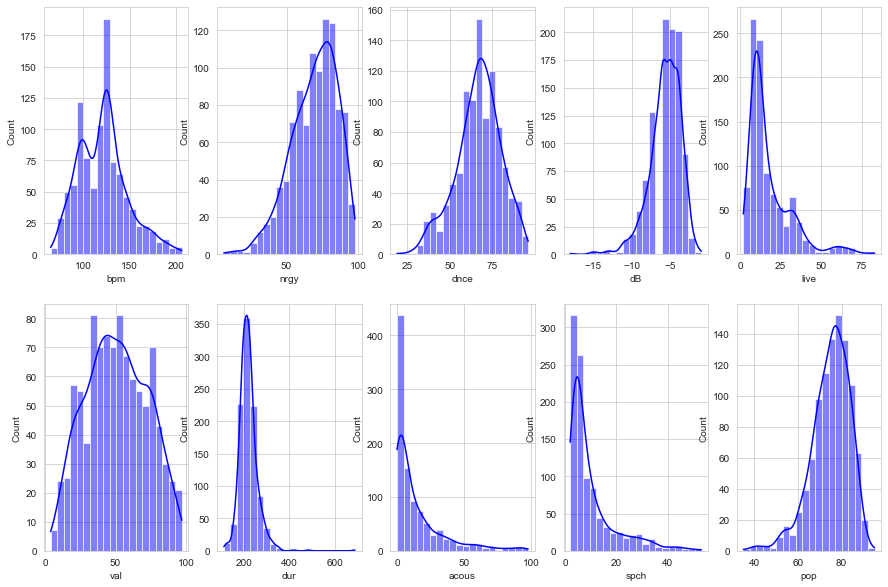

In [144]:
plt.figure(figsize = (15,10))

for i in range(0, len(nums)):
    
    plt.subplot(2, 5, i+1)

    sns.histplot(data = df, x = df[nums[i]] ,color = 'blue', kde= True, bins = 20 )

In [145]:
cat = ['title', 'artist', 'top genre', 'artist type']
df[cat].describe()

,title,artist,top genre,artist type
count,1000,1000,1000,1000
unique,945,444,132,4
top,Paradise,Taylor Swift,dance pop,Solo
freq,3,21,361,748


In [146]:
cat

['title', 'artist', 'top genre', 'artist type']

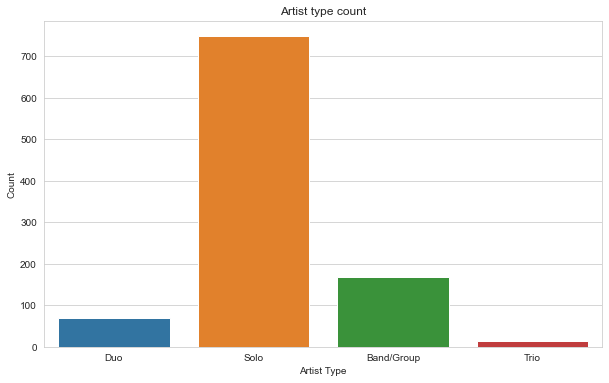

In [147]:
plt.figure(figsize=(10,6))

sns.countplot(x = df['artist type'], orient = 'v', palette= 'tab10')
plt.title('Artist type count')
plt.xlabel('Artist Type')
plt.ylabel('Count')
plt.show()

In [148]:
# # Creating a new column 'ranking'
# ranking = np.arange(1,101,1)
# ranking = np.tile(ranking, reps = 10)
# df.insert(0, 'ranking', ranking)


In [149]:
df.sample(5)

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
302,3,Why'd You Only Call Me When You're High?,Arctic Monkeys,garage rock,2013,2020‑06‑11,92.0,63.0,69.0,-6.0,10.0,80.0,161.0,5.0,4.0,90.0,2013,Band/Group
493,94,2 On (feat. ScHoolboy Q),Tinashe,alternative r&b,2014,2020‑06‑10,101.0,60.0,74.0,-8.0,11.0,43.0,227.0,15.0,11.0,77.0,2014,Solo
293,94,50 Ways to Say Goodbye,Train,dance pop,2012,2020‑06‑22,140.0,94.0,59.0,-3.0,14.0,74.0,248.0,0.0,5.0,73.0,2012,Band/Group
977,78,Circles,Post Malone,dfw rap,2019,2020‑06‑22,120.0,76.0,70.0,-3.0,9.0,55.0,215.0,19.0,4.0,89.0,2019,Solo
401,2,Amnesia,5 Seconds of Summer,boy band,2014,2020‑06‑10,102.0,50.0,57.0,-5.0,21.0,11.0,237.0,3.0,3.0,71.0,2014,Band/Group


# What were the top5 genres of each year?

In [150]:
# We will only use the top five genre that appers each year, so the pie doesn't get confusing. We will use 'Other' to the rest of the genres

In [151]:
df.columns

Index(['year_ranking', 'title', 'artist', 'top genre', 'year released',
       'added', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous',
       'spch', 'pop', 'top year', 'artist type'],
      dtype='object')

In [152]:
# years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]


# for i in range(0,len(years)):

#     new_top_genre = df[(df['top year'] == years[i])]['top genre'].value_counts()
#     new_top_genre = new_top_genre.reset_index()

#     for x in range(0,len(new_top_genre)):
#         if x >= 5:
#             new_top_genre['index'].iloc[x] = 'Outros'

#     new_top_genre.rename({'index':'genres', 'top genre': 'count'}, axis = 1, inplace = True)

#     outros_sum = new_top_genre[(new_top_genre['genres'] == 'Outros')]['count'].sum()

#     for y in range(0, len(new_top_genre)):
#         if y > 4:
#             new_top_genre = new_top_genre.drop(y)

#     new_top_genre = new_top_genre.append({'genres' : 'Outros', 'count' : outros_sum}, ignore_index= True)

    
    
#     plt.figure(figsize=(24,12))
#     plt.subplot(2,5, i+1)
#     plt.pie(new_top_genre['count'], labels = new_top_genre['genres'], labeldistance = 0.40, startangle= 90,
#             rotatelabels=30 )
#     sns.set_palette("hls", 8)
    
    
#     plt.title(f'Top 5 genres in {years[i]}', fontdict={'fontsize':18, 'color':'black'})
#     plt.tight_layout()
#     plt.show();

c:\Users\rafae\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


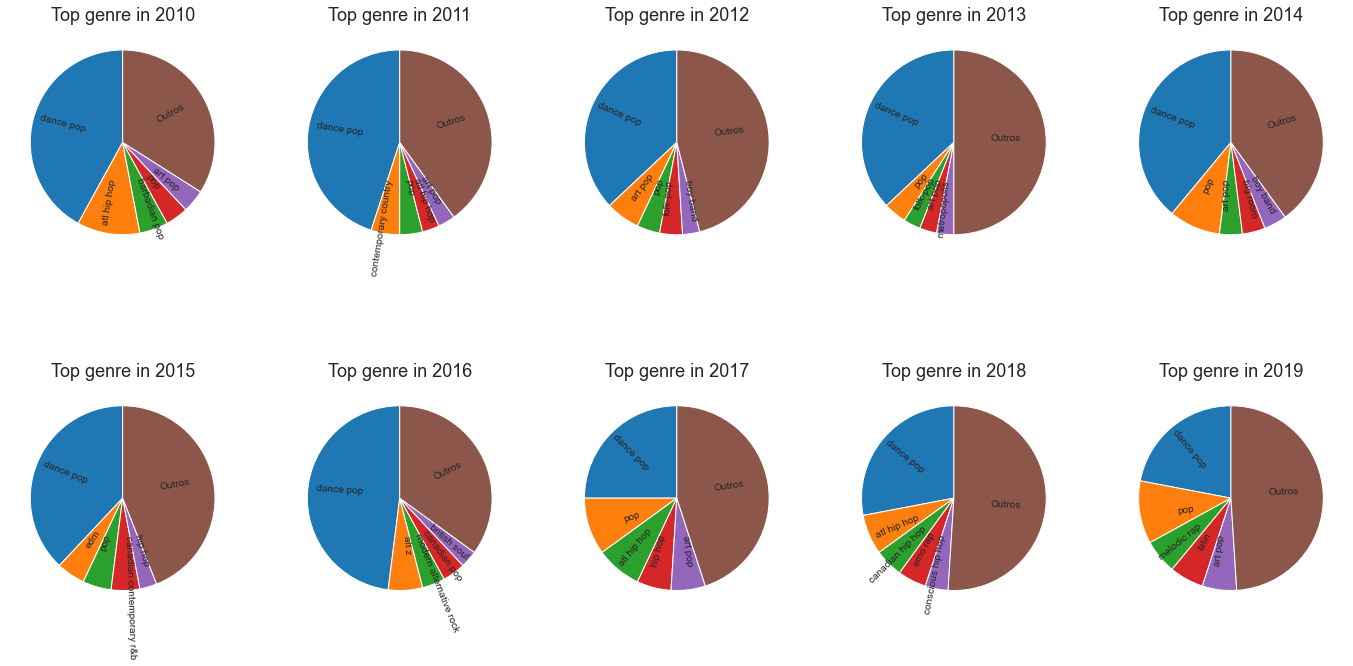

In [153]:
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
fig, axs = plt.subplots(2,5, figsize = (24,12))
axs = axs.ravel()


for i in range(0,len(years)):

    new_top_genre = df[(df['top year'] == years[i])]['top genre'].value_counts()
    new_top_genre = new_top_genre.reset_index()

    for x in range(0,len(new_top_genre)):
        if x >= 5:
            new_top_genre['index'].iloc[x] = 'Outros'

    new_top_genre.rename({'index':'genres', 'top genre': 'count'}, axis = 1, inplace = True)

    outros_sum = new_top_genre[(new_top_genre['genres'] == 'Outros')]['count'].sum()

    for y in range(0, len(new_top_genre)):
        if y > 4:
            new_top_genre = new_top_genre.drop(y)

    new_top_genre = new_top_genre.append({'genres' : 'Outros', 'count' : outros_sum}, ignore_index= True)

    
    
    axs[i].pie(new_top_genre['count'], labels = new_top_genre['genres'], labeldistance = 0.40, startangle= 90,
            rotatelabels=30 )
    axs[i].set_title(f'Top genre in {years[i]}', fontdict = {'fontsize': '18'});
    


Dance pop appeared every year in the top 1 genre.

## What are the top 10 artists that appeared the most in the top 100 ranking during theses 100 years?

In [154]:
df.head()

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,1,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010,Duo
1,2,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010,Duo
2,3,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010,Solo
3,4,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010,Solo
4,5,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010,Solo


In [155]:
# We have 444 artist in the dataset
df.artist.nunique()

444

In [156]:
top10_artist = df.artist.value_counts()[:10]
top10_artist

Taylor Swift     21
Drake            18
Calvin Harris    18
Rihanna          14
Ariana Grande    14
Bruno Mars       13
Maroon 5         11
Post Malone      10
Jason Derulo     10
Ed Sheeran       10
Name: artist, dtype: int64

In [157]:
# Checking if there're more artists with 10 appearing
df.artist.value_counts()[:15]

Taylor Swift      21
Drake             18
Calvin Harris     18
Rihanna           14
Ariana Grande     14
Bruno Mars        13
Maroon 5          11
Post Malone       10
Jason Derulo      10
Ed Sheeran        10
Chris Brown       10
One Direction      9
David Guetta       9
Katy Perry         9
Kendrick Lamar     9
Name: artist, dtype: int64

In [158]:
# Because we have Chris Brown also with 10 appearances in the top 100, we will include him as well
top10_artist = df.artist.value_counts()[:11]

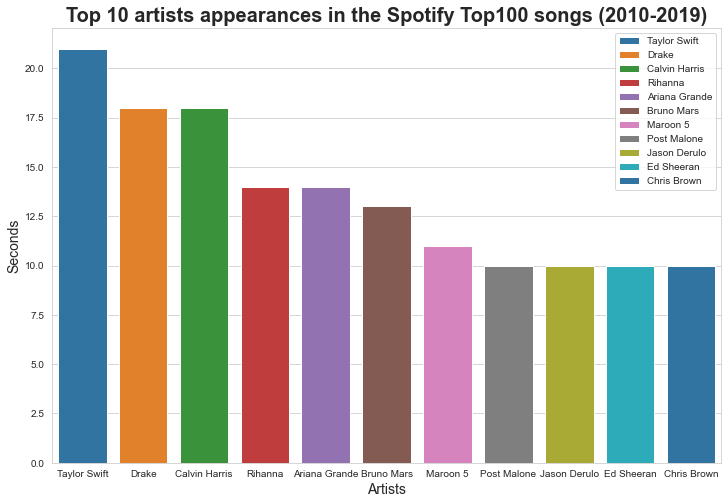

In [159]:
fig = plt.figure(figsize = (12,8))

sns.barplot(x = top10_artist.index, y = top10_artist.values, hue = top10_artist.index, dodge = False, palette = 'tab10')

plt.xlabel('Artists', fontdict={'fontsize': 14})
plt.ylabel('Seconds', fontdict={'fontsize': 14})
plt.title('Top 10 artists appearances in the Spotify Top100 songs (2010-2019)', fontdict={'fontsize': 20}, fontweight = 'bold')

plt.show()

## What are the average length of the top 100 songs in each year?

In [160]:
df.head()

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,1,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010,Duo
1,2,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010,Duo
2,3,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010,Solo
3,4,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010,Solo
4,5,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010,Solo


In [161]:
mean_dict = {}
for i in range(2010, 2020, 1):
    mean_dict[i] = df[(df['top year'] == i)]['dur'].mean()

mean_dict


{2010: 226.45,
 2011: 230.19,
 2012: 226.38,
 2013: 229.49,
 2014: 227.9,
 2015: 218.46,
 2016: 219.86,
 2017: 221.04,
 2018: 208.79,
 2019: 195.5}

In [162]:
# # Converting second into min:sec

# for i in range(2010, 2020, 1):
#     seconds = mean_dict[i] 
#     convert = time.strftime("%M:%S", time.gmtime(seconds))
#     mean_dict[i] = convert

# mean_dict


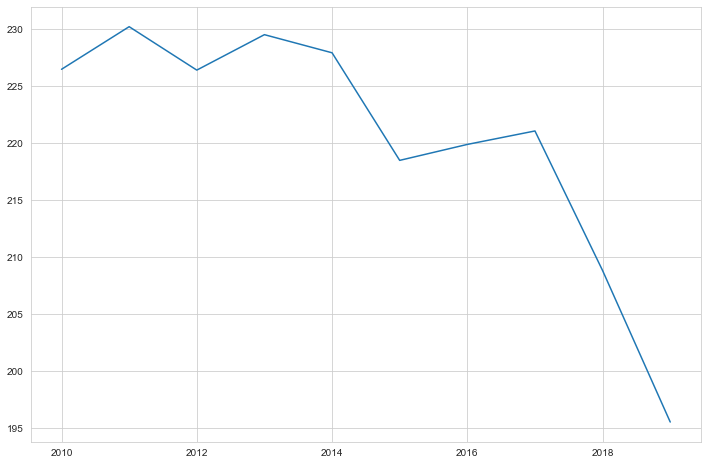

In [163]:
plt.figure(figsize = (12,8))

sns.set_style('whitegrid')
sns.lineplot(x = mean_dict.keys(), y =mean_dict.values(), markers = True, dashes= False)

plt.show()

We could see that the avg length of the songs have been dropping since 2010

## Comparing the top 100 songs duration with the top 10 songs of each year

In [164]:
df.sample(5)

,year_ranking,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
127,28,Who's That Chick? (feat. Rihanna),David Guetta,big room,2010,2020‑06‑16,128.0,60.0,68.0,-5.0,5.0,93.0,201.0,0.0,12.0,66.0,2011,Solo
32,33,In My Head,Jason Derulo,dance pop,2010,2022‑02‑17,110.0,75.0,76.0,-4.0,35.0,85.0,199.0,3.0,3.0,67.0,2010,Solo
317,18,When I Was Your Man,Bruno Mars,dance pop,2012,2020‑06‑11,73.0,28.0,61.0,-9.0,9.0,39.0,214.0,93.0,4.0,89.0,2013,Solo
129,30,Louder,DJ Fresh,dancefloor dnb,2012,2020‑06‑16,140.0,93.0,39.0,-1.0,35.0,48.0,207.0,2.0,5.0,40.0,2011,Solo
316,17,Locked out of Heaven,Bruno Mars,dance pop,2012,2020‑06‑11,144.0,70.0,73.0,-4.0,31.0,87.0,233.0,5.0,4.0,91.0,2013,Solo


In [165]:
h = pd.DataFrame()

for i in range(1,11):
    h = h.append(other = df.iloc[df[(df['year_ranking'] == i)].index])


In [166]:
# Agora fazer o groupby 'top year', achar a media do 'dur' e dps comparar com a media o dataset inteiro
df_1 = df.groupby(['top year']).agg({'dur': ['mean']}).reset_index()
df_1.columns = ['top year', 'dur']
df_1

,top year,dur
0,2010,226.45
1,2011,230.19
2,2012,226.38
3,2013,229.49
4,2014,227.90
5,2015,218.46
6,2016,219.86
7,2017,221.04
8,2018,208.79
9,2019,195.50


In [167]:
df_2 = h.groupby(['top year']).agg({'dur': ['mean']}).reset_index()
df_2.columns = ['top year', 'dur']
df_2

,top year,dur
0,2010,228.7
1,2011,234.3
2,2012,222.0
3,2013,224.7
4,2014,220.4
5,2015,216.4
6,2016,233.6
7,2017,207.4
8,2018,181.3
9,2019,214.3


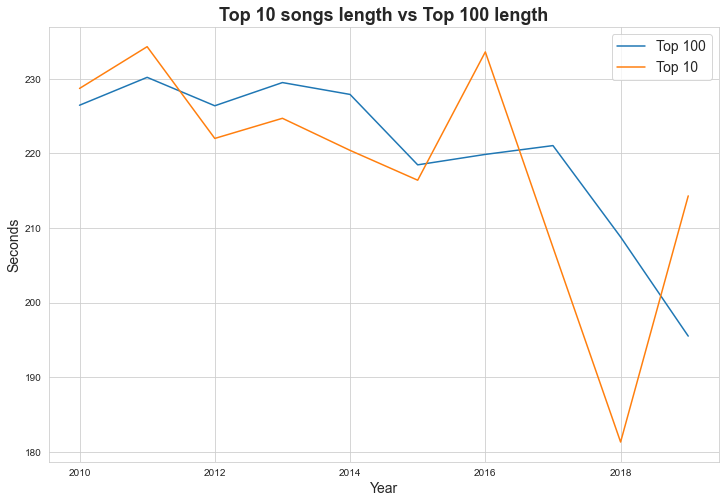

In [168]:
plt.figure(figsize= (12,8))

sns.lineplot(data = df_1, x = 'top year', y = 'dur')
sns.lineplot(data = df_2, x = 'top year', y = 'dur')

plt.legend(['Top 100', 'Top 10'], fontsize = 14)
plt.xlabel('Year', fontdict={'fontsize': 14})
plt.ylabel('Seconds', fontdict={'fontsize': 14})
plt.title('Top 10 songs length vs Top 100 length', fontdict={'fontsize': 18}, weight = 'bold')
plt.show()